# Data Cleaning and Analysis of Exoplanet Dataset

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/PhysData/course/blob/main/docs/notebooks/cleaning_notebook.ipynb)

If you're running this in Colab, make sure to save a copy of the notebook in Google Drive to save your changes.

Welcome to the Data Cleaning and Analysis of Exoplanet Dataset notebook. Here you will learn some techniques using Pandas to clean a dataset. We will use data from the Extrasolar Planet Encyclopedia, which is structured as a CSV file. It is very messy as it comes from different sources.

Our task will be to clean and filter everything to get a comprehensive dataframe. The questions we will be trying to answer are: 
* How does the mass of the planets correlates with their radius?
* What does this tells us about the planets' compositions?

Check out the appendix at the end for a different way of organising the dataset to answer an alternative set of questions!

In [ ]:
# If you're running this notebook, uncomment the code in this cell to install the required packages.
# ! pip install pandas
# ! pip install seaborn
# ! pip install matplotlib
# ! pip install numpy

In [3]:
import pandas as pd
import matplotlib as plt
import seaborn as sb
import numpy as np

# You will need to input this path.

path = './'
sb.set_style('whitegrid')

## Loading the CSV file and looking at the uncleaned data 

In [4]:
kepler_base = pd.read_csv(path+'kepler.csv')



########### STEP 1: INITIAL LOOK

# Looking at the first 20 rows of data and getting the total size of the dataset.
print(kepler_base.head(20))
print(f'Rows: {kepler_base.shape[0]} ; Columns: {kepler_base.shape[1]}')

                    # name planet_status   mass  mass_error_min  \
0    OGLE-2016-BLG-1469L b     Confirmed  13.60            3.00   
1                 11 Com b     Confirmed  19.40            1.50   
2                 11 Oph b     Confirmed  21.00            3.00   
3                 11 UMi b     Confirmed  10.50            2.47   
4                 14 And b     Confirmed   5.33            0.57   
5                 14 Her b     Confirmed   4.64            0.19   
6               16 Cyg B b     Confirmed   1.68            0.07   
7                 18 Del b     Confirmed  10.30             NaN   
8               1I/2017 U1     Confirmed    NaN             NaN   
9              1RXS 1609 b     Confirmed  14.00            3.00   
10          1SWASP J1407 b     Confirmed  20.00            6.00   
11                24 Sex b     Confirmed   1.99            0.38   
12                24 Sex c     Confirmed   0.86            0.22   
13       2M 0103-55 (AB) b     Confirmed  13.00            1.0

In [5]:
# Getting the names of the different columns.
print(list(kepler_base.columns))

['# name', 'planet_status', 'mass', 'mass_error_min', 'mass_error_max', 'mass_sini', 'mass_sini_error_min', 'mass_sini_error_max', 'radius', 'radius_error_min', 'radius_error_max', 'orbital_period', 'orbital_period_error_min', 'orbital_period_error_max', 'semi_major_axis', 'semi_major_axis_error_min', 'semi_major_axis_error_max', 'eccentricity', 'eccentricity_error_min', 'eccentricity_error_max', 'inclination', 'inclination_error_min', 'inclination_error_max', 'angular_distance', 'discovered', 'updated', 'omega', 'omega_error_min', 'omega_error_max', 'tperi', 'tperi_error_min', 'tperi_error_max', 'tconj', 'tconj_error_min', 'tconj_error_max', 'tzero_tr', 'tzero_tr_error_min', 'tzero_tr_error_max', 'tzero_tr_sec', 'tzero_tr_sec_error_min', 'tzero_tr_sec_error_max', 'lambda_angle', 'lambda_angle_error_min', 'lambda_angle_error_max', 'impact_parameter', 'impact_parameter_error_min', 'impact_parameter_error_max', 'tzero_vr', 'tzero_vr_error_min', 'tzero_vr_error_max', 'k', 'k_error_min', '

## An initial rough clean of the dataset

Start by creating a list of the columns that you wish to drop. For example, we don't really need the error columns for what we want to do. They may have been needed if we had different questions to resolve. For instance, had one of the questions been regarding the link between detection methods used and the success rate, we would have wanted to keep these columns as they would have provided information on the apparatus used. We will use several methods for deciding which of the columns to discard:

* Some columns such as the 'error' ones are not of interest to us. We will discard them by identifying that they all have the word 'error' within their title.
* Some columns have information but not enough for it to be interesting.
* Some columns won't be useful in answering the question and we will manually select them.
        
We will use the `df.drop()` function:

In [6]:
# List of column names in dataset:
column_name = kepler_base.columns

# List of columns to drop:
columns_drop = []


# First round, dropping the error columns:
for col in column_name:
    if 'error' in col:
        columns_drop.append(col)

kepler_drop = kepler_base.drop(columns= columns_drop)

Furthermore, we notice that some rows have infinite values. This doesn't give us any more information than `nan` values, so for clarity we will transform these `inf` values into `nan` values. It will enable us to quickly indentify any empty cells. This will also be useful in the next steps, where we want to look at the number of individual values a column has.

In [7]:
def transfer_inf(df):
    for column in df:
        infinities = (df[column] == np.inf)
        if infinities.sum() > 0:
            df.loc[infinities, column] = 'nan'

    return df

kepler_drop = transfer_inf(kepler_drop)

In [8]:
# Looking at the data, there seem to be some columns that do not provide any interesting information (for example, planet status). 
# We can look at the different values in these columns and see whether they are all the same or not.
print(kepler_base['planet_status'].unique())

['Confirmed']


As all stars have the same status, we are not getting any additional information from this column. We cannot individually look at all columns to see the number of unique values they have. The snippet of code below will select all columns that have only one singular value.

In [9]:
singular = []
for col in kepler_base:
    list = kepler_base[col]

    if len(list.unique()) < 2:
        # print(col)
        singular.append(col)
        # print(list.unique())

kepler_drop=kepler_drop.drop(columns= singular)

Looking at the columns, we see that the descriptive ones (such as the star's name) will not be of any use to us. Since they do not have any attributes in common, we need to manually decide which ones we wish to remove.

In [10]:
descriptivecol = ['# name', 'publication_status', 'alternate_names', 'star_name', 'star_alternate_names', 
                  'radius_detection_type', 'mass_detection_type', 'detection_type', 'log_g', 'star_sp_type', 
                  'star_detected_disc', 'star_magnetic_field','updated', 'discovered']

kepler_drop = kepler_drop.drop(columns = descriptivecol)

Some columns also seem to store very few values. If less than 30% of a column is filled, we can drop it as it won't provide a good representation of reality. We need to find a way to calculate the number of non-zero values in a column. We do this by getting the percentage of `nan` entries within a column.

In [11]:
# Function to drop columns based off of their percentage of nan values.
# Notice that here the percentage relates to the null values and not the valid ones.
def drop_percentage(df, perc):
    lowperc = []

    for col in df:
        na_num = df[col].isnull().sum(skipna=False)
        # print(na_num)
        colperc = (na_num/df.shape[0])*100
        if colperc > perc and col !='molecules':
            # print(f'column: {col}, percentage: {colperc}')
            lowperc.append(col)
    # print(lowperc)

    df=df.drop(columns=lowperc)
    # print(df.columns)
    return df

kepler_drop= drop_percentage(kepler_drop, 70)

We can now see what the dataset looks like. Notice that there are now less columns! With 17 columns, our dataset has become manageable while still containing enough features to create some interesting graphs. This is the perfect spot to save our cleaned CSV file under a new name using the `to_csv` function. We then pass our main dataframe as this cleaned one with the usual `read_csv` function.

In [12]:
print(kepler_drop.head(10))
print(f'number of columns: {kepler_drop.shape[1]}')
kepler_drop.to_csv(path+'kepler_cleaned.csv', index = False)

    mass    radius  orbital_period  semi_major_axis  eccentricity   molecules  \
0  13.60       NaN             NaN             0.33           NaN         NaN   
1  19.40       NaN          326.03             1.29         0.231         NaN   
2  21.00       NaN       730000.00           243.00           NaN         NaN   
3  10.50       NaN          516.22             1.54         0.080         NaN   
4   5.33       NaN          185.84             0.83         0.000         NaN   
5   4.64       NaN         1773.40             2.77         0.369         NaN   
6   1.68       NaN          799.50             1.68         0.689         NaN   
7  10.30       NaN          993.30             2.60         0.080         NaN   
8    NaN  0.000002             NaN              NaN         1.196         NaN   
9  14.00  1.700000             NaN           330.00           NaN  H2O, CO, K   

           ra        dec  mag_v  mag_j  mag_h  mag_k  star_distance  \
0  271.945750 -26.289889    NaN    Na

## Analysis and final formatting of the cleaned data

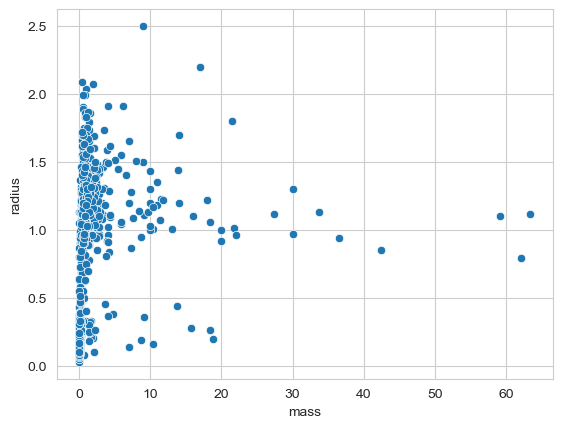

In [13]:
# Dataframe we will be working with from now on.
kepler_cleaned = pd.read_csv(path+'kepler_cleaned.csv')


# Looking at correlation between mass and radius.
fig = sb.scatterplot(data = kepler_cleaned, x = 'Mass', y = 'Radius', )
# sb.set(rc={'figure.figsize':(12,12)})

plt.pyplot.show()

Looking at the graph above, we are unable to find a strong correlation between mass and radius. However, we can use the values stored in these two columns to calculate the corresponding density of each planet. This will allow us to look for a better relationship.

In [14]:
def find_density(radius, mass):
    volume = (4/3)*np.pi*(radius**3)
    density = mass/volume
    return density

for m in kepler_cleaned['mass']:
    pos = kepler_cleaned[kepler_cleaned['mass'] == m].index.tolist()
    r = kepler_cleaned['radius'][pos]
    for radius in r:
        if radius != np.nan:
            density = find_density(radius, m)
            # print(density)
            kepler_cleaned.loc[pos, 'density'] = density

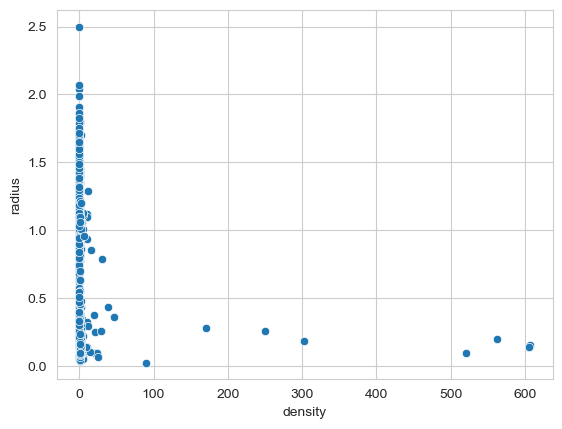

In [15]:
radius_density = sb.scatterplot(data = kepler_cleaned, y = 'Radius', x = 'Density', palette="rocket")
plt.pyplot.show()

So, we see that there is indeed a correlation between the radius and density. This is compatible with our theory seperating the gas giants from the smaller, rocky planets.

Looking at the molecules, we will find that we are considering too many different combinations of them. We can try to shorten this list, as well as seperate the values into different columns to get the individual counts for each molecule (H2O, K, CO) separately, rather than for each combination. Admittedly, this will not be of much use to us in this notebook since the amount of null values in the 'molecules' column is very small. Had it not been the focus of one of the questions, it would have undoubtedly been left to the side. However, it can be very useful when looking at categorical data as it allows us to look at it from a different point of view.

In [16]:
# Finding out the unique values in molecules.
values = kepler_cleaned['molecules'].unique().tolist()
values.remove(values[0])
unique_mol = [np.nan]
for v in values:
    str(v)
    v=v.split()
    for vv in v:
        vv = vv.replace(',','')
        if vv not in unique_mol:
            unique_mol.append(vv)


# Adding empty columns for the different molecules to the dataframe.
# We will use these to keep track of the count for each molecule.
for element in unique_mol:
    kepler_cleaned[element] = np.nan

# Adding a value of 1 to the relevant column each time a planet contains the molecule.
for row in values:
    pos = kepler_cleaned[kepler_cleaned['molecules'] == row].index.tolist()

    for element in range(1, len(unique_mol)-1):
        unique_mol[element] = unique_mol[element].replace(',','')

        if unique_mol[element] in row:
                kepler_cleaned.loc[pos, unique_mol[element]] = 1
        else:
                kepler_cleaned.loc[pos, unique_mol[element]] = np.nan

kepler_cleaned.to_csv(path+'kepler_mol.csv', index = False)

df_mol = pd.read_csv(path+'kepler_mol.csv')

# What do these new columns look like?
# We won't look at the actual values due to their sparsity, but we can instead look at the column counts.
print(df_mol[['H2O', 'CO', 'K', 'CH4', 'HCN', 'O2', 'H2', 'N2', 'CO2', 'H', 'NH3', 'O', 'I', 'C', 'Na', 'VO', 'Mg', 'TiO', 'He']].count())

H2O    31
CO     13
K      11
CH4    14
HCN     3
O2      6
H2     32
N2      1
CO2     6
H      37
NH3     3
O      36
I       8
C      25
Na      9
VO      4
Mg      1
TiO     5
He      0
dtype: int64


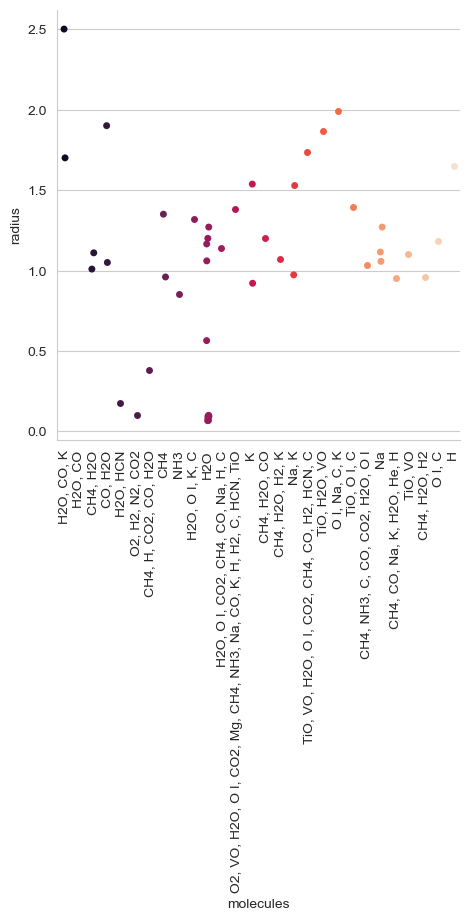

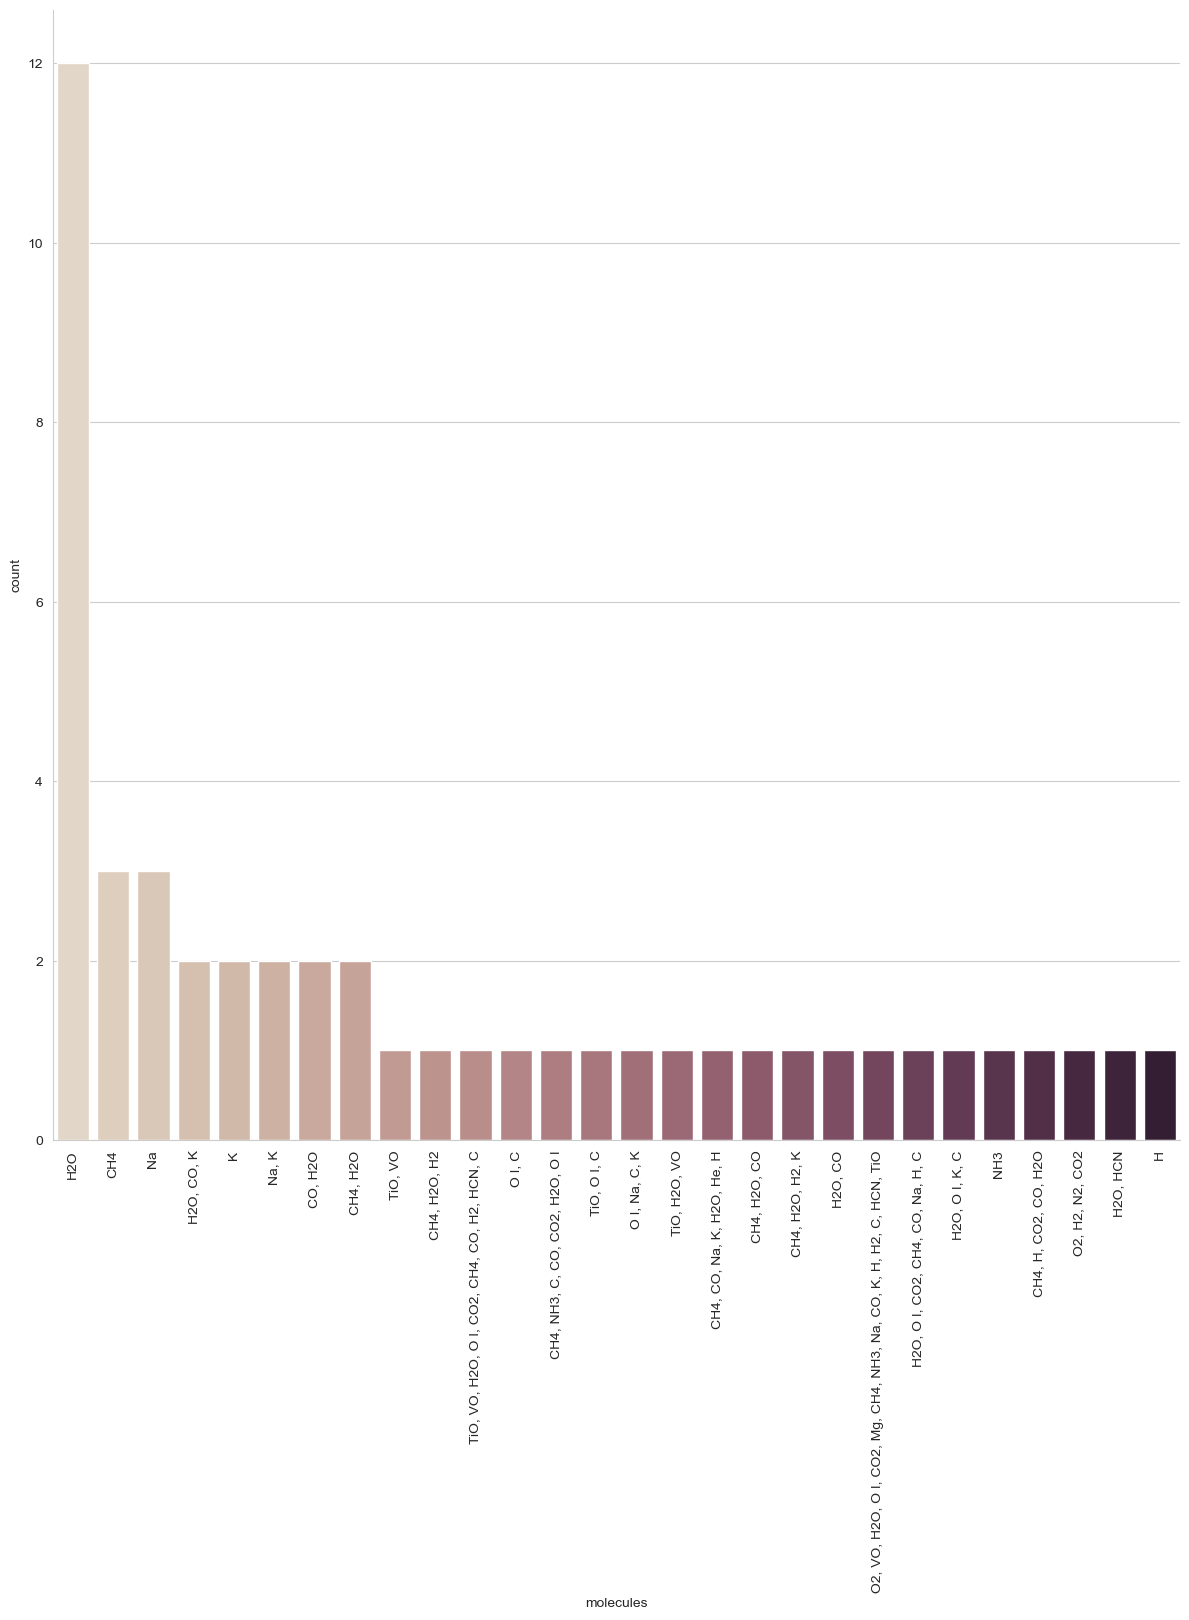

In [17]:
mol_rad = sb.catplot(data = kepler_cleaned, x = 'Molecules', y = 'Radius', palette="rocket")
plt.pyplot.xticks(rotation=90)
molecules_count = sb.catplot(data=kepler_cleaned, x="Molecules", kind="count", palette="ch:.25", order = kepler_cleaned['molecules'].value_counts().index, height=12, aspect = 1)

plt.pyplot.xticks(rotation=90)
sb.set(rc={'figure.figsize':(12,12)})
plt.pyplot.show()

This graph is very busy. We can make it more relevant by removing the combinations that do not appear a lot.

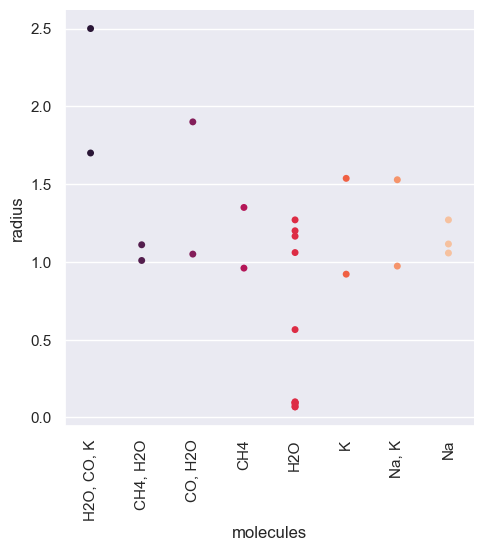

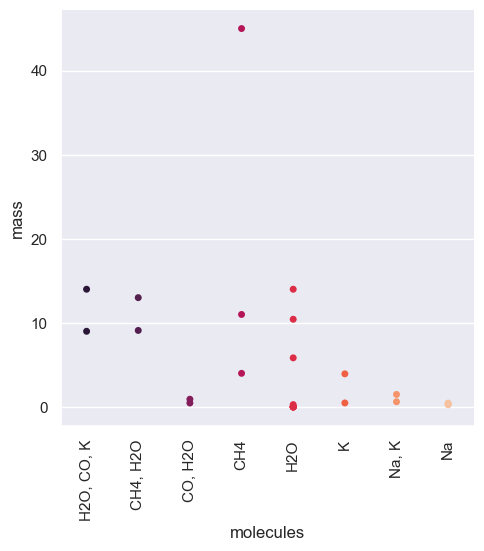

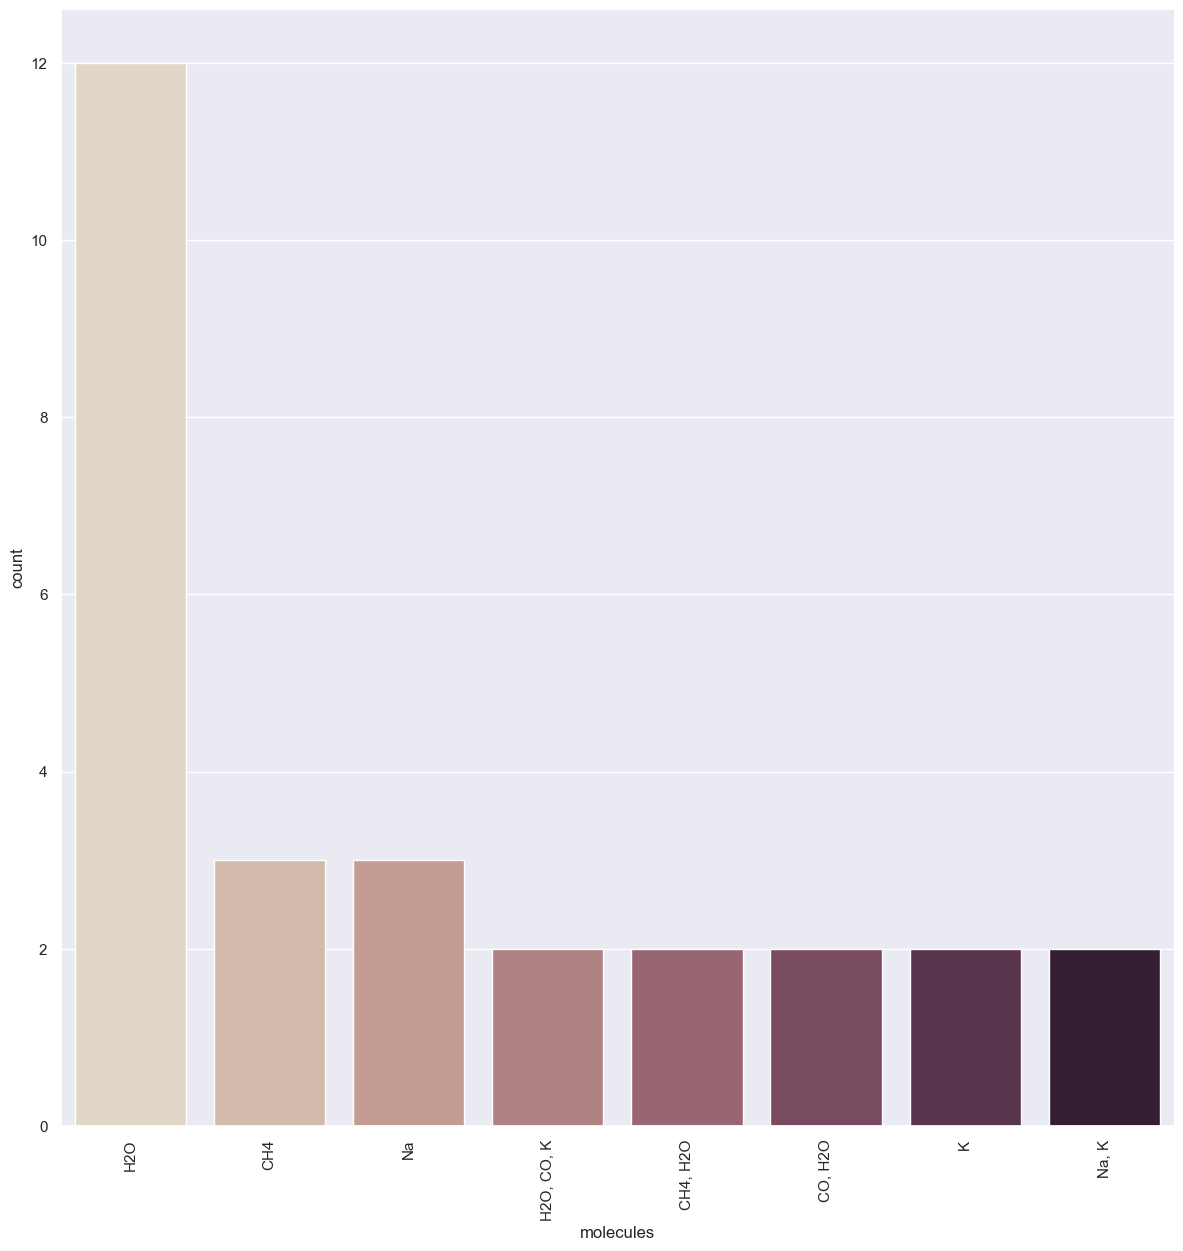

In [18]:
for row in values:
    pos = df_mol[df_mol['molecules'] == row].index.tolist()
    if len(pos)<2:
        df_mol.loc[pos, 'molecules'] = np.nan

# Looking at the figure again:
relevantmol_rad = sb.catplot(data = df_mol, x = 'Molecules', y = 'Radius', jitter = False, palette="rocket")
plt.pyplot.xticks(rotation=90)
sb.set(rc={'figure.figsize':(12,12)})
relevantmol_mass = sb.catplot(data = df_mol, x = 'Molecules', y = 'Mass', jitter = False, palette="rocket")
plt.pyplot.xticks(rotation=90)
relevantmol_count = sb.catplot(data=df_mol, x="Molecules", kind="count", palette="ch:.25", order =df_mol['molecules'].value_counts().index, height=12, aspect = 1)


plt.pyplot.xticks(rotation=90)
sb.set(rc={'figure.figsize':(12,12)})
plt.pyplot.show()

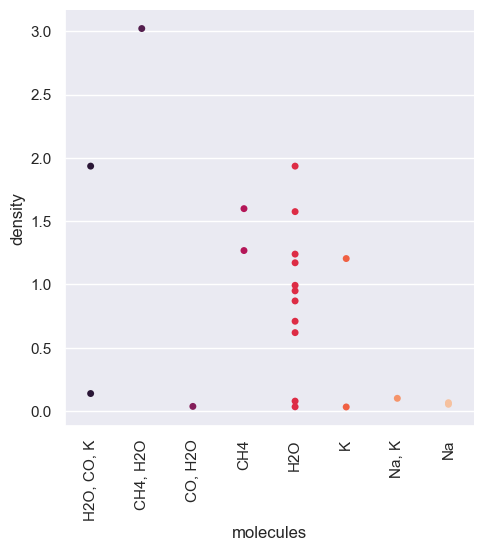

In [19]:
# Using density instead of mass.
fig = sb.catplot(data = df_mol, x = 'molecules', y = 'density', jitter = False, palette="rocket")
plt.pyplot.xticks(rotation=90)
sb.set(rc={'figure.figsize':(12,12)})
plt.pyplot.show()

## Use of categorical data alongside numerical data

In [20]:
# Merge datasets together: going back on our project, we would like to include the 'detection type' column back into this dataframe.
# We don't want to go onto the old dataframe because we have worked on this one.

# The astype(int) function call allows you to not have a year format.

df_mol.insert(1, 'discovered', kepler_base['discovered'].fillna(0).astype(int))
df_mol.insert(1, 'detection_type', kepler_base['detection_type'])

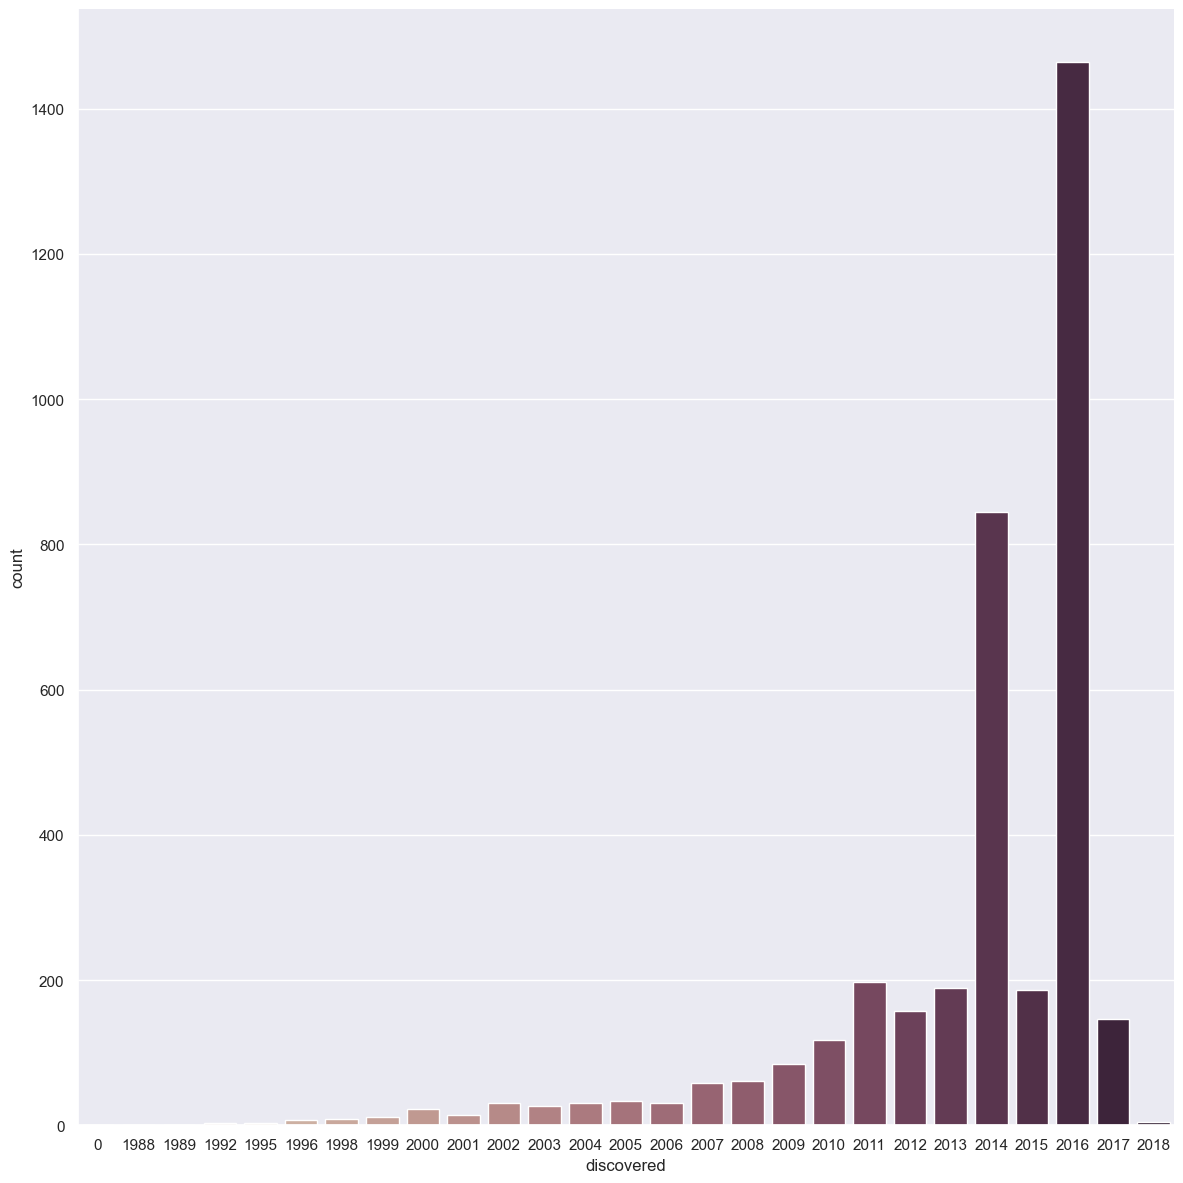

In [21]:
# Let's take the example of the number of exoplanets discovered in a year.

discyear = sb.catplot(data = df_mol, x='Discovered', kind="count", palette="ch:.25", height=12, aspect = 1)

So, we have the year discovered and notice that 2016 was a good year. But we can also wonder what happens if we now consider the detection type. Let's first visualise the different detection types and how they perform. We can then seperate them into 3 categories based on the two highest performers and the others:

['Microlensing' 'Radial Velocity' 'Imaging' 'Primary Transit' 'Pulsar'
 'Other' 'Astrometry' 'TTV' 'Primary Transit, TTV']


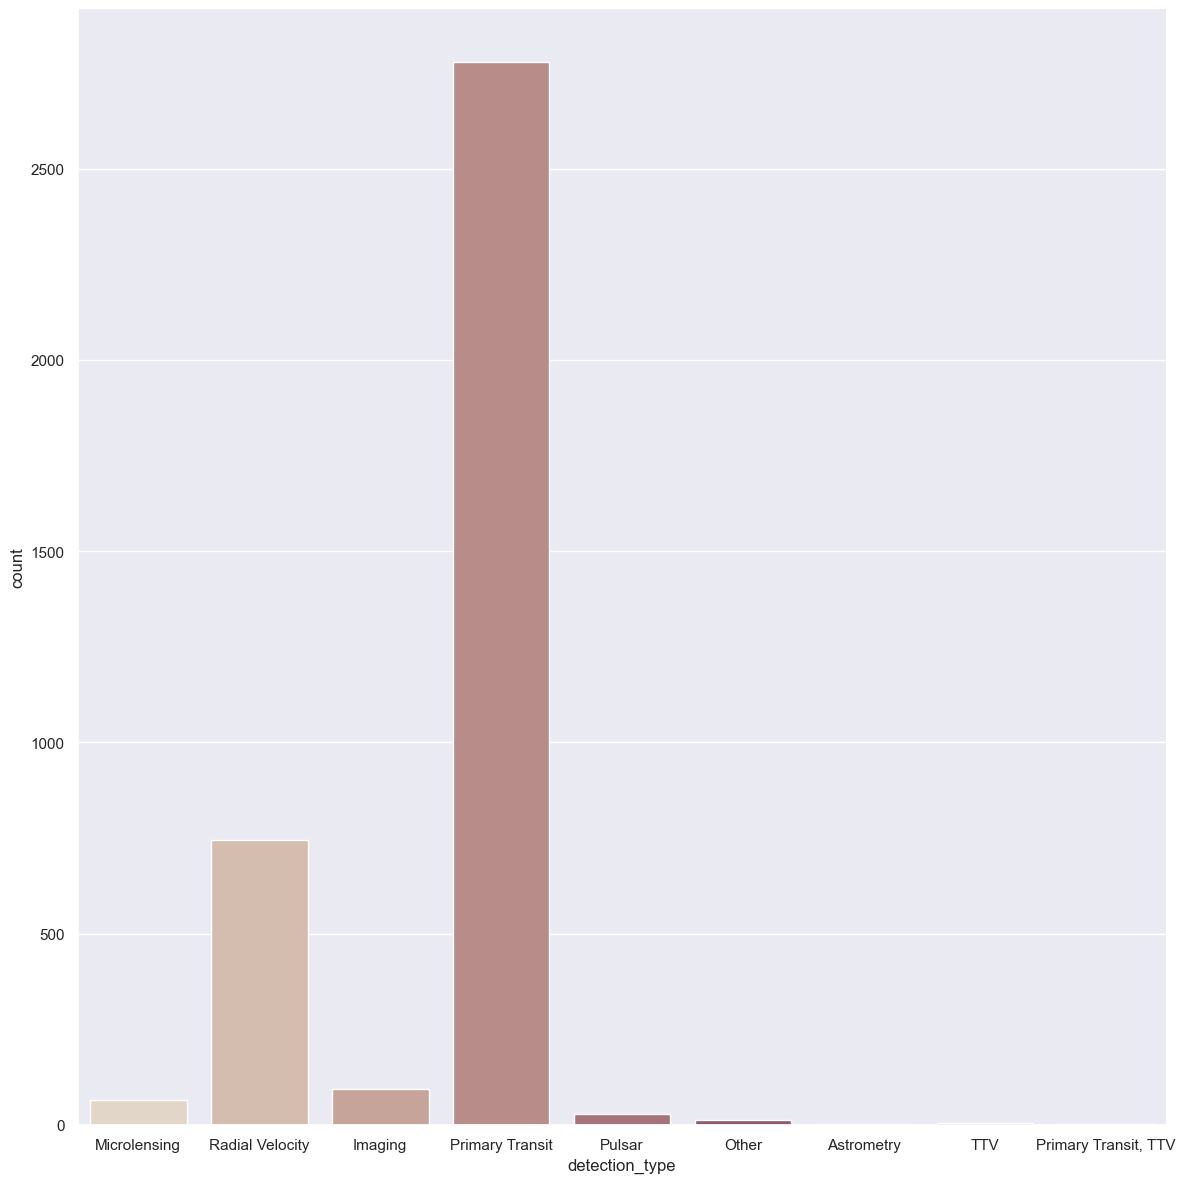

In [22]:
print(df_mol['detection_type'].unique())

typeperf = sb.catplot(data = df_mol, x='detection_type', kind="count", palette="ch:.25", height=12, aspect = 1)

['Other' 'Radial Velocity' 'Primary Transit']


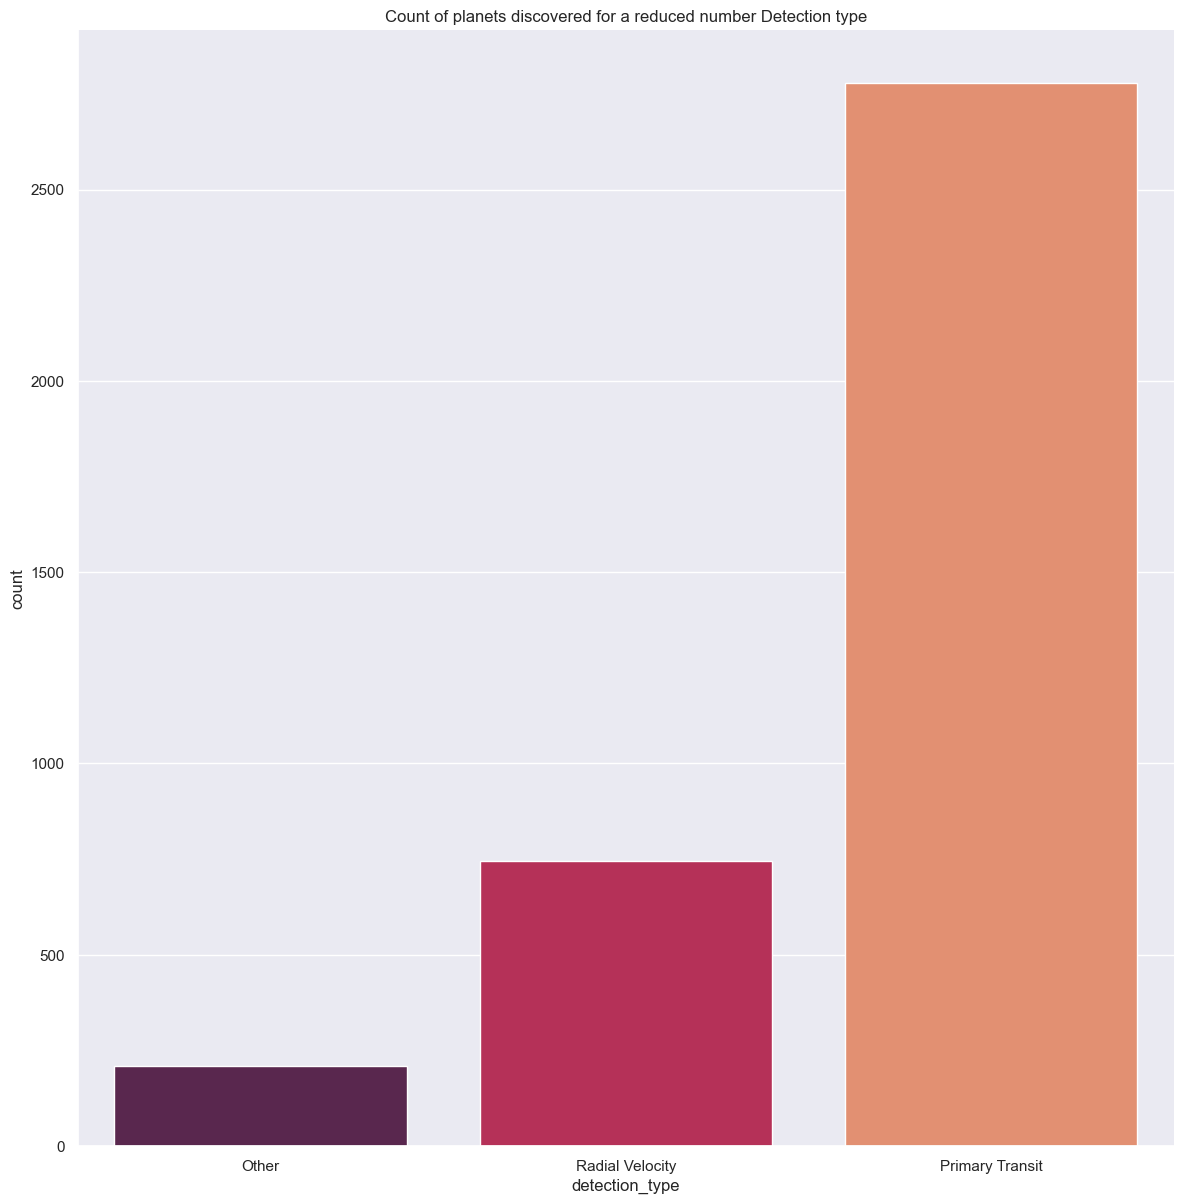

In [23]:
for type in df_mol['detection_type']:
    type = str(type)
    pos = df_mol[df_mol['detection_type'] == type].index.tolist()
    if type == 'Primary Transit, TTV':
        df_mol.loc[pos, 'detection_type'] = 'Primary Transit'
    if type not in ['Primary Transit', 'Radial Velocity', np.nan]:
        df_mol.loc[pos, 'detection_type'] = 'Other'
        
print(df_mol['detection_type'].unique())
typeperf = sb.catplot(data = df_mol, x='detection_type', kind="count", palette="rocket", height=12, aspect = 1)

typeperf.set(title='Counts of planets discovered for a reduced-number detection type')

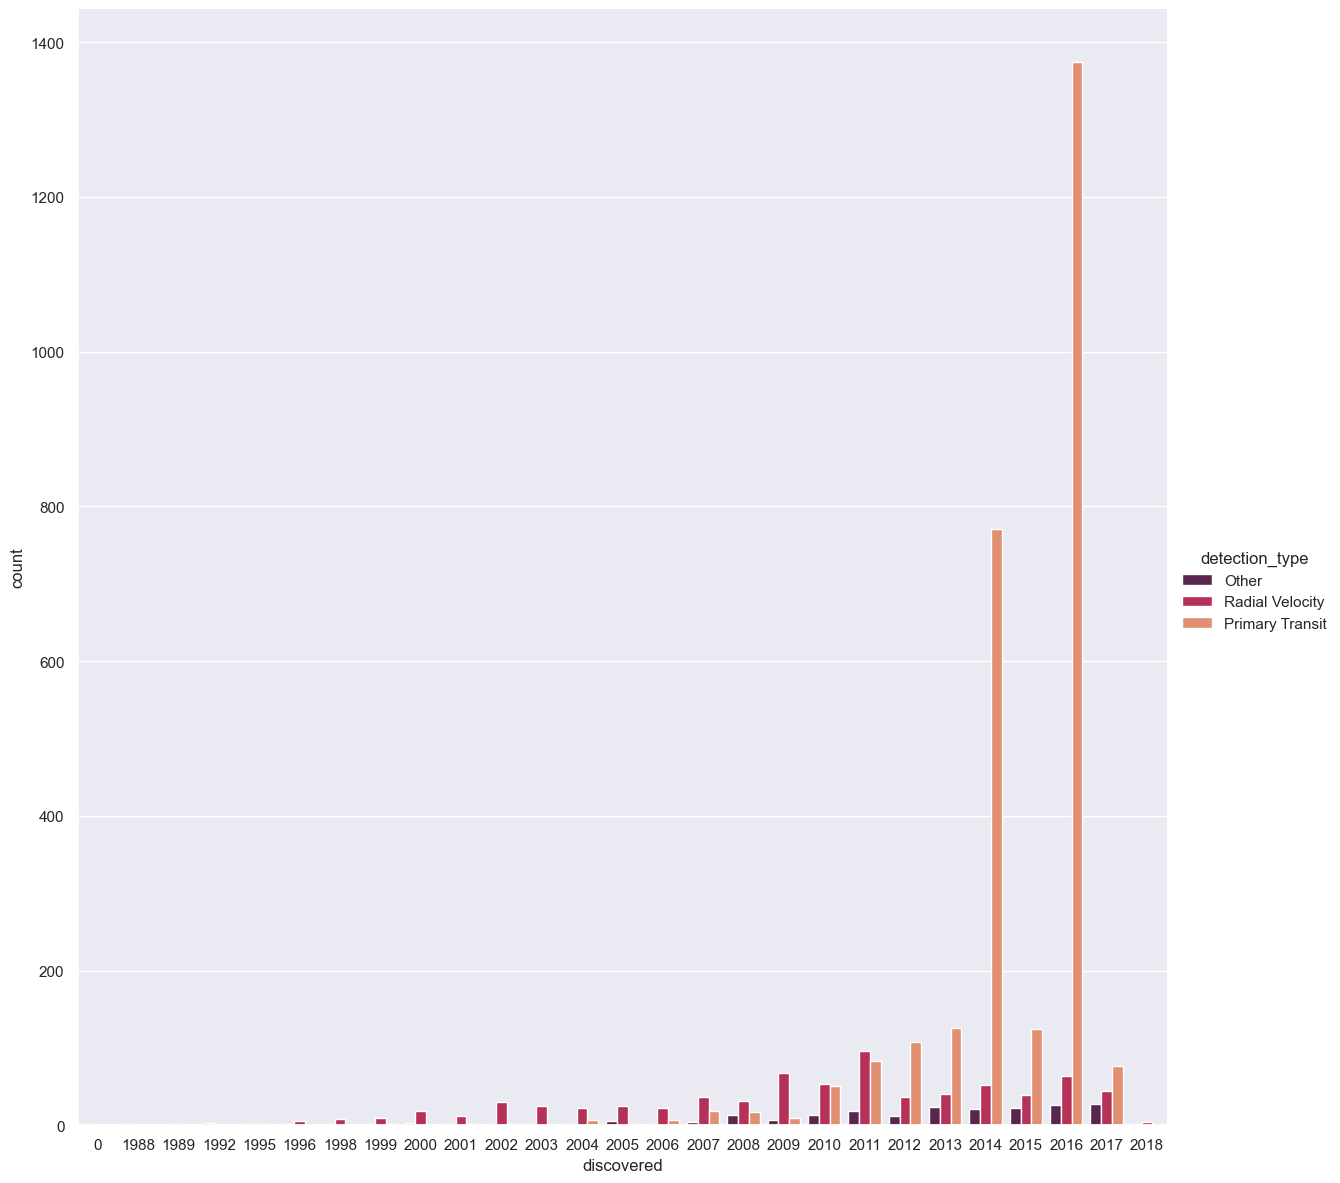

In [24]:
# Now that we have less types, we can even mix the two columns together.
detectionbytype = sb.catplot(data = df_mol, x='Discovered', hue = 'detection_type', kind="count", palette="rocket", height=12, aspect = 1)

We see that, while primary transit has discovered the most exoplanets by far, it only surpassed detection by radial velocity in 2012.

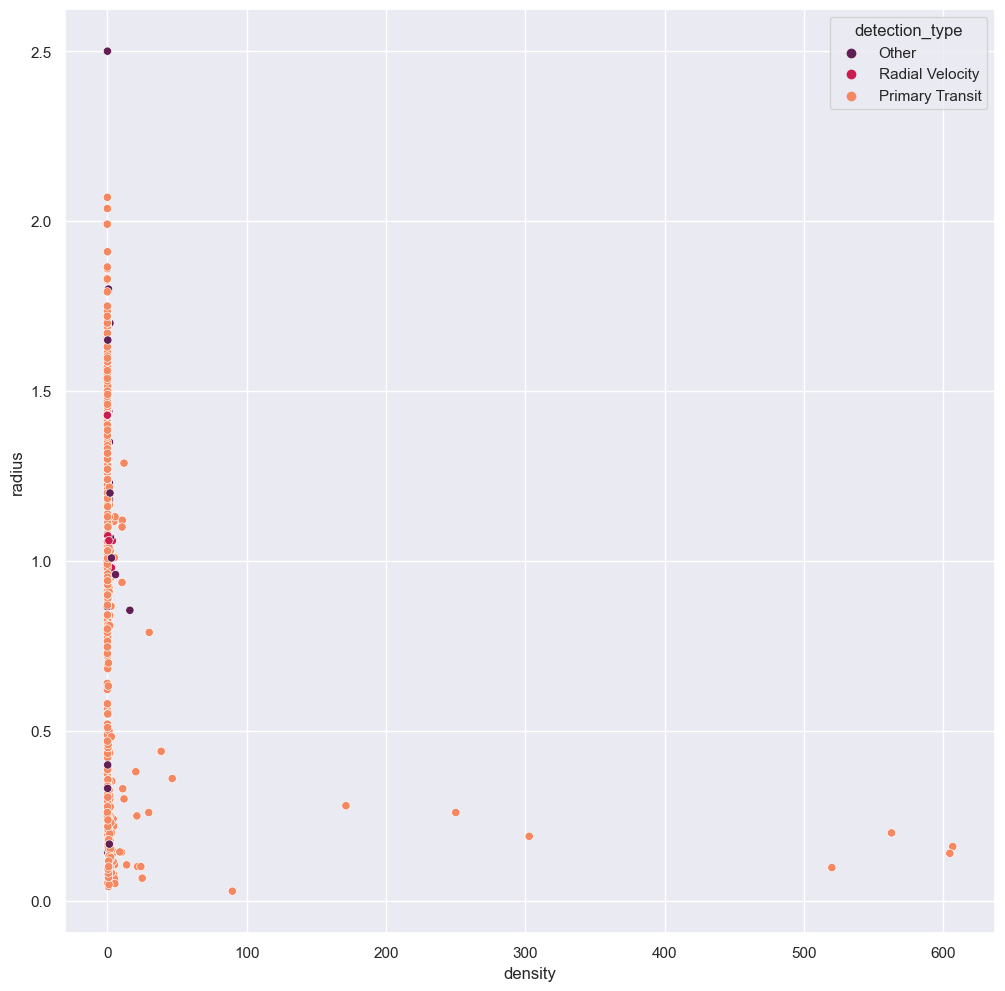

In [25]:
# We can even mix our clean categorical data with the numerical data.
# For example, we can look at whether the detection type influenced what type of planet was discovered.
# Are some types better with denser planets, for example?

numandcat = sb.scatterplot(data = df_mol, y = 'Radius', x = 'Density', hue= 'detection_type', palette="rocket")

By this point, you can imagine how difficult it would have been to read this graph had we not grouped the lesser detection methods together. We would have had a very long key and too many colours on the graph for it to be readable. Our cleaning has allowed us to immediately notice that primary transit as a detection method is good for all exoplanets, whereas the others only picked up on exoplanets with very small densities.

## Conclusion and final thoughts

Given that we have found a correlation between density and detection type and have seen the varying use of the different detection types accross the years, can you find a way to look at the evolution of the densities of the exoplanets observed throughout the years?

If you wish to get an overview of the remaining topics in this course, click the button below.

[![Back to main website](../media/back4.png)](https://physdata.vercel.app/)